In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import pandas as pd
%ls Data

highp_finalresults.csv  lowp_finalresults.csv


# Data Formatting
Here we give format to data for better manipulation.

Few things are important to state about the following process of formatting:

### Mass and density parameters were passed to logarithmic scale as it is a usual practice in astrophysics for a better analysis of various relations. 

### Planetary parameters [a(i),emegas(i),rplanet(i)/radtie] were omitted as they are not necessary to calculate quantities to predict, nor they are initial conditions of the system (we want to predict).

### Parameters ['ident', 't', 'gama', 'apert', 'fpert', 'constmigI'] were dropped as well. Identity index is an arbitrary identifier and is not taken into account. The rest of omitted parameters are the same for all systems and have no prediction power. For these parameters, we calculated the standard deviation and verified that it is zero. (Data_Formatting.ipynb).


----------------------------

----------------------------

In [4]:
# Loads data (Fills NaN values as 0 for simplicity) THERE IS ONLY ONE NaN VALUE 
data=pd.read_csv("./Data/highp_finalresults.csv",sep = ',',
                 engine = 'python',skipinitialspace = True,na_values = 'NaN ').fillna(0)
# Each row, (for now is a different planet)
# Adds column named n_planet___ it is later going to be summed
data["n_planets"] = 1

# Selects useful planet data only to produce: number of planets, total mass of planets. 
# Identity of system is conserved
planet_data = data[['ident','emepla(i)/emet','n_planets']]

# Selects system data only. 
# System columns corresponding to initial condition
# According to repository README.md, we have to drop: a(i),emegas(i),emepla(i)/emed,rplanet(i)/radtie
system_data = data.drop(['a(i)','emegas(i)','emepla(i)/emet','rplanet(i)/radtie','n_planets'],1)

# System data is repeated as rows represent planets -> so we take the mean
system_data = system_data.groupby(system_data['ident']).mean()

# From planets data it is only necesary the total data (total mass, total number of planets)
planet_data = planet_data.groupby(planet_data['ident']).sum()

# Concatenate two data frames to obtain final formatted data
data = pd.concat([system_data,planet_data], axis=1).reset_index()

# Drops unimportant parameters with null std()
# 0,2,8,9,10,11 are unimportant parameters
# Data for the first point
print(data.keys()[[0,2,8,9,10,11]])
data = data.drop(data.keys()[[0,2,8,9,10,11]],1)

# Creates column corresponding to mass efficiency
data['m_efficiency'] = data['emepla(i)/emet']/data['emed']

# Logarithmic scales for mass-related parameters (1e-5 to avoid log(0)=-infty)
data['emepla(i)/emet'] = np.log(data['emepla(i)/emet']+1e-5)
data['emestar'] = np.log(data['emestar']+1e-5)
data['emed'] = np.log(data['emed']+1e-5)
data['sigmag_0'] = np.log(data['sigmag_0']+1e-5)
data['m_efficiency'] = np.log(data['m_efficiency']+1e-5)


# Important position of parameters
print(' total mass, number of planets, mass efficiency',np.where(data.keys()=='n_planets'),
      np.where(data.keys()=='emepla(i)/emet'),np.where(data.keys()=='m_efficiency'))

# Shows variable data
data.head(15)

Index([u'ident', u't', u'gama', u'apert', u'fpert', u'constmigI'], dtype='object')
(' total mass, number of planets, mass efficiency', (array([9]),), (array([8]),), (array([10]),))


,it,emestar,rc,qest,sigmag_0,emed,emetal,taugas,emepla(i)/emet,n_planets,m_efficiency
0,199993,75.157068,59.882370,1.110726,3.937451,-2.040144,0.077070,9268935.0000,2.096372,11,4.136591
1,198840,74.422324,40.040195,3.201758,2.819352,-3.962790,-0.092791,3525593.5000,1.039386,13,5.002699
2,199995,75.360733,40.647163,1.965345,4.214270,-2.538181,0.514770,9390406.0000,2.076882,9,4.615189
3,199755,74.967751,29.539343,9.568532,2.785820,-4.604171,0.328146,1644710.6250,1.938003,18,6.543171
4,199319,74.742551,61.195038,2.230675,2.764218,-3.169848,-0.220031,9468353.0000,1.161167,10,4.331250
5,199834,75.485455,38.977428,5.082291,3.455076,-3.381101,-0.150160,1014449.0625,1.539754,19,4.921146
6,198714,74.912779,47.343380,5.121542,2.535559,-3.911523,0.021273,1790533.1250,1.220502,17,5.132522
7,199619,74.853960,42.739063,3.225643,3.111750,-3.540115,-0.092571,2721394.7500,1.674280,12,5.214738
8,198489,75.488793,58.158928,4.369815,2.912512,-3.123338,-0.282408,6017040.5000,1.385713,12,4.509277
9,199991,75.323966,30.851170,1.224490,5.096811,-2.207184,-0.065073,1576467.7500,2.360289,11,4.567563


# The Regression

We chose nearest neighbor method to predict the required parameters given some training data.

This algorithm is similar to that analogue of classification where nearest neighbors 'vote' to decide the label of a poind determined by X. Here, an average (it can be weighted) is taken to produce the continuous output for the prediction variable.

For each of the wanted predictions: (number of planets, total mass, mass efficiency), this method is going to be applied. But first, it is going to be chosen the optimal parameters.

The parameters we are going to vary are just the weight function, which can be 'uniform' (each neighbor has the same power of decision on the average) or 'distance' (nearest neighbors have more weight than farther neighbors); and the number of neighbors to have into account

To decide which method is more efficient, we use the usual exponential of $\chi^2$ as efficiency function:

$$ \varepsilon = exp\left(-\frac{1}{2}\frac{\sum_{i=1}^N (y_i^*-y_i)^2}{N\sigma_y^2}\right)$$

Here $y^*_i$ is the prediced value and $y_i$ is the real value. $N$ is the number of data and $\sigma_y$ is the standard deviation of the data set $\{y_i\}$. This efficiency $\epsilon$ has the property that is scale-invariant and does not (in general) increases with the size of the data set $\{y_i\}$.

In [5]:
# Efficiency function
def efficiency(y_predicted, y_test):
    return np.exp(-0.5*(sum((y_predicted-y_test)**2)/(len(y_test)*(y_test.std()**2))))

# This function gets efficiencies for varying parameters> weights and n_neighbors
def getEffs(Xdata,Ydata, nmax):

    # Splits data into trainig and test set.
    X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25,
                                                    random_state=int(100*np.random.random()))
    # Empty lists of efficiencies
    uniform = []
    distance = []
                                                        
    # number of neighbors vary from [1 to nmax)
    for i in range(1,nmax):
                                                        
        # Initializes the regressor with uniform weight
        neigh = KNeighborsRegressor(n_neighbors=i, weights = 'uniform' )
        # Algorithm training
        neigh.fit(X_train, y_train)
        # Prediction from test                                                
        y_predicted = neigh.predict(X_test)
        # Efficiency
        epsilon = efficiency(y_predicted,y_test)
        # Append
        uniform.append(epsilon)
        
        # Process is repeated for distance-weighted algorithm
        neigh = KNeighborsRegressor(n_neighbors=i, weights = 'distance' )
        neigh.fit(X_train, y_train)
        y_predicted = neigh.predict(X_test)
        epsilon = efficiency(y_predicted,y_test)
        distance.append(epsilon)
        
    uniform = np.array(uniform)
    distance = np.array(distance)
    return uniform,distance

# This method trains the algorithm and returns the trained object ready for predictions.
# Parameters weight and number_neighs to be given
def getNeigh( X_train, y_train,weight='uniform',number_neighs=5):
    # Initializes the regressor with uniform weight
    neigh = KNeighborsRegressor(n_neighbors=number_neighs, weights = weight )
    # Algorithm training
    neigh.fit(X_train, y_train)
    
    return neigh

# Plots each column of X vs y
# if bool = true, it also plots ypred
# indie is the index of the component represented on Y axis
def plott(X,y,data, indie, ypred=None ,boolean = False):
    import matplotlib.gridspec as gridspec
    fig, axes = plt.subplots( nrows=4, ncols=4, figsize=(15,20) )
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    #plt.title( 'Sample of relations in training data' )
    gs = gridspec.GridSpec(4,2)
    ax0 = plt.subplot(gs[0, 0])
    ax1 = plt.subplot(gs[0, 1])
    ax2 = plt.subplot(gs[1, 0])
    ax3 = plt.subplot(gs[1, 1])
    ax4 = plt.subplot(gs[2, 0])
    ax5 = plt.subplot(gs[2, 1])
    ax6 = plt.subplot(gs[3, 0])
    ax7 = plt.subplot(gs[3, 1])
    axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]
    for i in range(len(np.array(X).T)):
        #print(i)
        ax = axes[i]
        ax.plot(np.array(X).T[i],y, marker = 'o', linewidth = 0, alpha = 0.3 , c = 'b', label = 'Real')
        if( boolean ):
            ax.plot(np.array(X).T[i],ypred, marker = 'o', linewidth = 0, alpha = 0.3, c = 'r',label = 'Predicted')
        ax.set_xlabel(data.keys()[i], fontsize = 30)
        ax.set_ylabel(data.keys()[indie], fontsize = 30)
        ax.legend()

# Amount of planets prediction


In [6]:
# Non initial condition parameters are dropped (total mass, mass efficiency)
#data[data.keys()[9]] = np.log(data[data.keys()[9]]+1e-5)
print(data.keys()[8],data.keys()[9])
Xdata =  data[data.keys()[:8]]
Ydata =  data[data.keys()[9]]
# Gets the efficiencies
nmax = 20
uniform,distance = getEffs(Xdata,Ydata,nmax)

('emepla(i)/emet', 'n_planets')


('distance', 6)


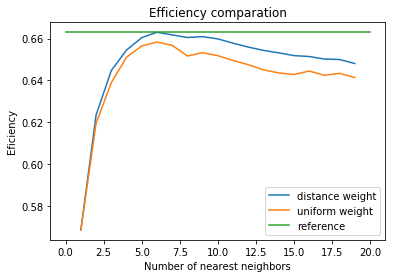

In [7]:
# Maximum efficiency
maxi  = max([max(distance),max(uniform)])
# Chooses beteween uniform or distance weight
weight = ['distance','uniform'][np.argmax([max(distance),max(uniform)])]
# Most efficient number of neighbors
N_neigh = np.argmax([distance,uniform][np.argmax([max(distance),max(uniform)])])+1
print(weight,N_neigh)

# Plots efficiency comparison
plt.plot(range(1,nmax),distance, label = 'distance weight')
plt.plot(range(1,nmax),uniform, label = 'uniform weight')
plt.plot([0,nmax],[maxi,maxi], label = 'reference')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Eficiency')
plt.title('Efficiency comparation')
plt.legend()

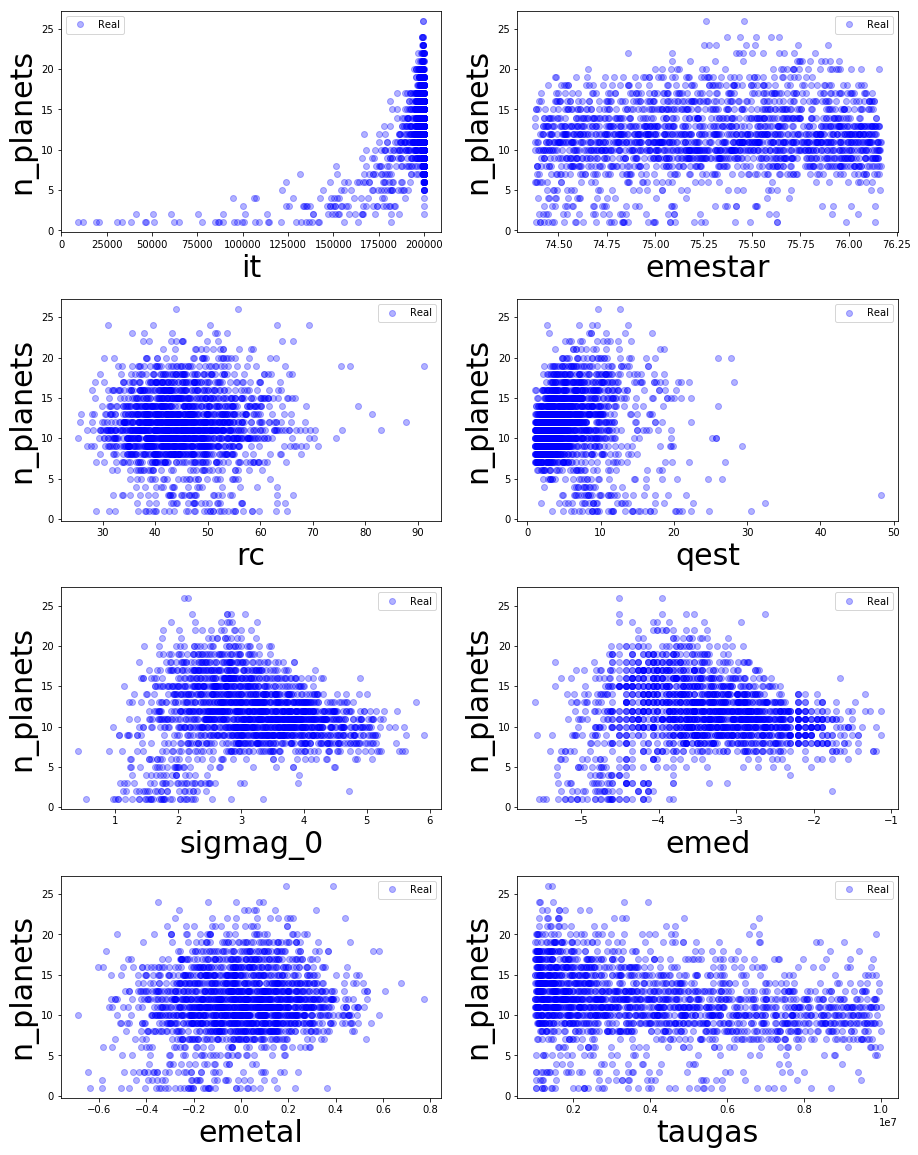

In [8]:
# Splits data into trainig and test set.
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25,
                                                    random_state=int(100*np.random.random()))

# Plots X_train, y_train
plott(X_train,y_train,data,9)

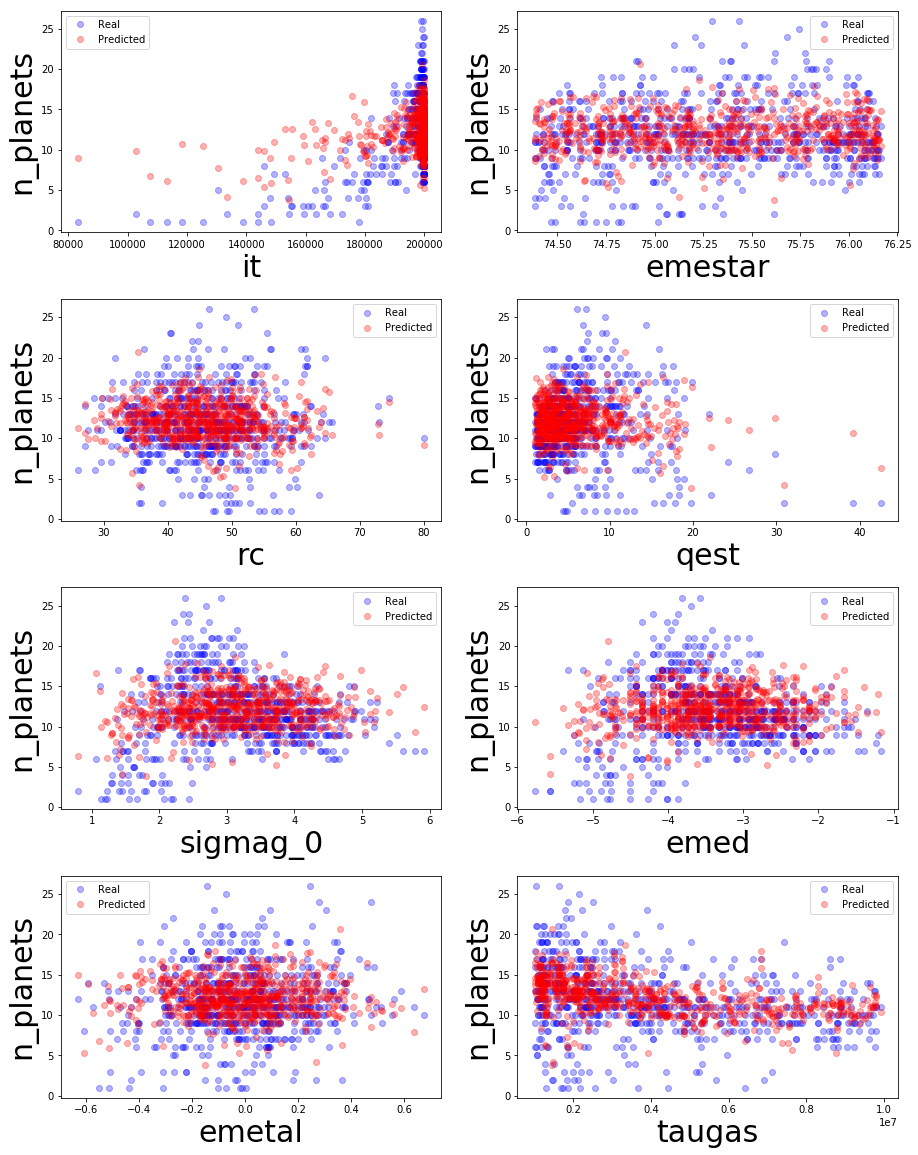

In [9]:
# Gets trained algorithm
neigh = getNeigh(X_train,y_train,number_neighs=N_neigh, weight=weight)
# Gets prediction
y_predicted = neigh.predict(X_test)

# Plots: 
# Plots X_test y_test, y_pred
plott(X_test,y_test,data,indie = 9, ypred=y_predicted, boolean=True )

# Total Mass prediction

In [10]:
# Non initial condition parameters are dropped (total mass, mass efficiency)
print(data.keys()[8],data.keys()[8])
Xdata =  data[data.keys()[:8]]
Ydata =  data[data.keys()[8]]
# Gets the efficiencies
nmax = 20
uniform,distance = getEffs(Xdata,Ydata,nmax)

('emepla(i)/emet', 'emepla(i)/emet')


('uniform', 5)


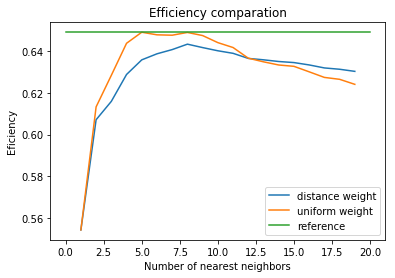

In [11]:
# Maximum efficiency
maxi  = max([max(distance),max(uniform)])
# Chooses beteween uniform or distance weight
weight = ['distance','uniform'][np.argmax([max(distance),max(uniform)])]
# Most efficient number of neighbors
N_neigh = np.argmax([distance,uniform][np.argmax([max(distance),max(uniform)])])+1
print(weight,N_neigh)

# Plots efficiency comparison
plt.plot(range(1,nmax),distance, label = 'distance weight')
plt.plot(range(1,nmax),uniform, label = 'uniform weight')
plt.plot([0,nmax],[maxi,maxi], label = 'reference')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Eficiency')
plt.title('Efficiency comparation')
plt.legend()

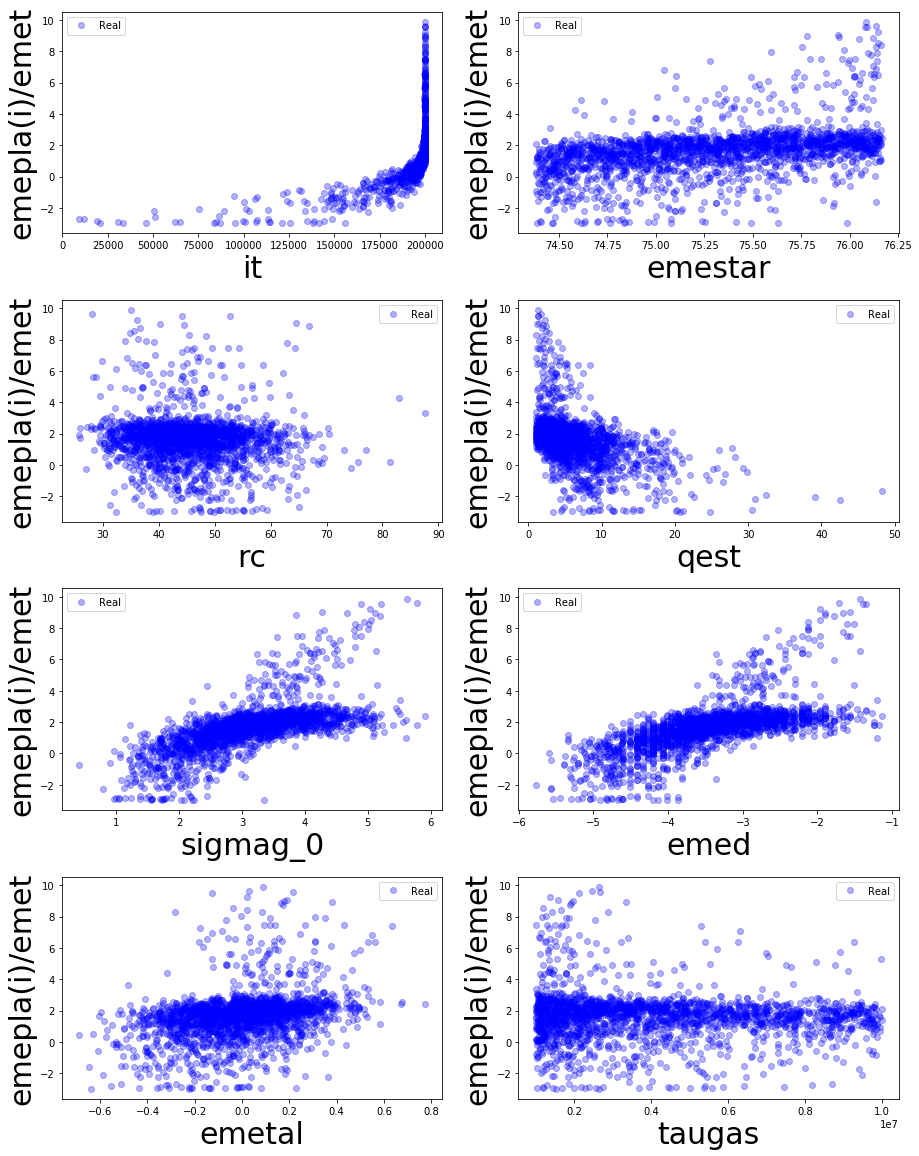

In [12]:
# Splits data into trainig and test set.
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25,
                                                    random_state=int(100*np.random.random()))

# Plots X_train, y_train
plott(X_train,y_train,data,8)

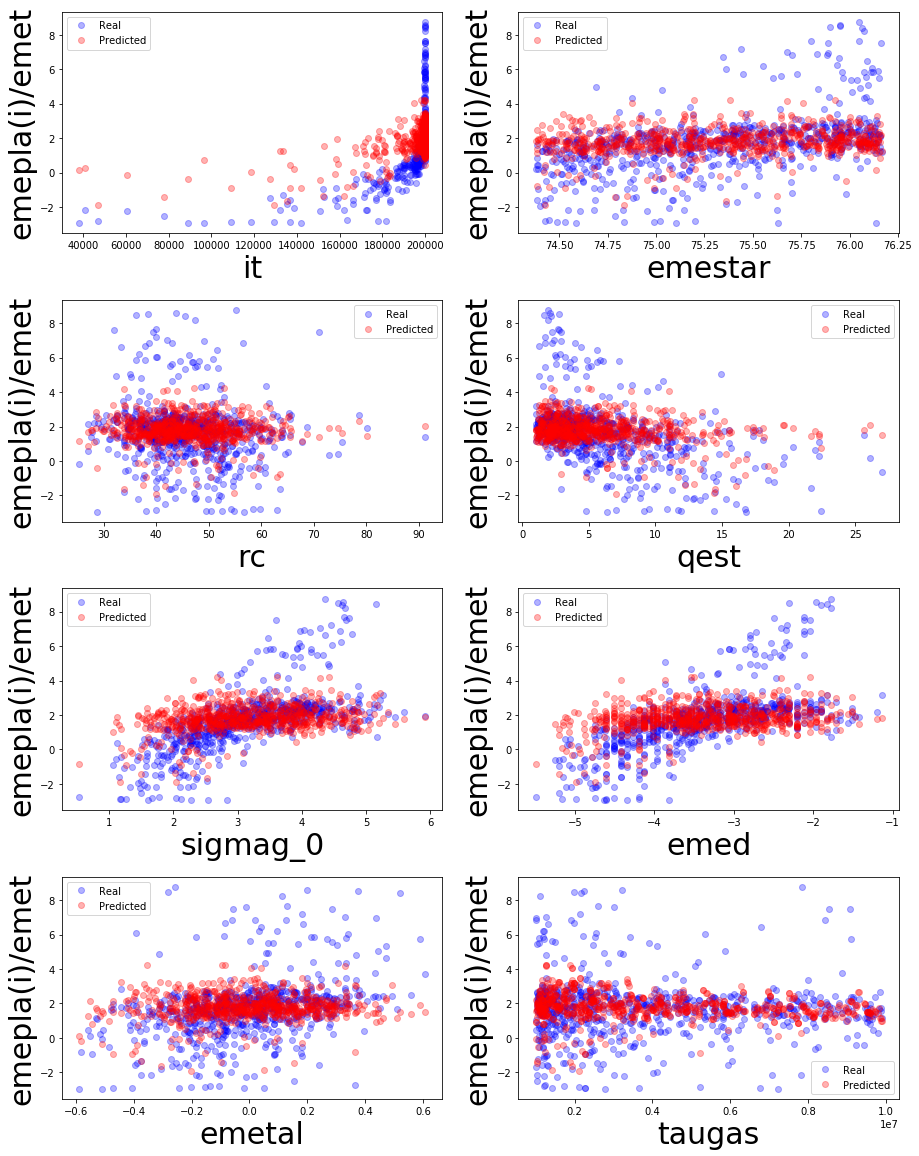

In [13]:
# Gets trained algorithm
neigh = getNeigh(X_train,y_train,number_neighs=N_neigh, weight=weight)
# Gets prediction
y_predicted = neigh.predict(X_test)

# Plots: 
# Plots X_test y_test, y_pred
plott(X_test,y_test,data,indie = 8, ypred=y_predicted, boolean=True )

# Mass Efficiency prediction


In [14]:
# Non initial condition parameters are dropped (total mass, mass efficiency)
# Disk information is dropped. If this is included, this prediction is the same as the prediction of the total mass
data2 = data.drop('emed',1)
#data2['m_efficiency'] = np.log(data2['m_efficiency'] +1e-6)
print(data2.keys()[7],data2.keys()[9])
Xdata =  data2[data2.keys()[:7]]
Ydata =  data2[data2.keys()[9]]
# Gets the efficiencies
nmax = 20
uniform,distance = getEffs(Xdata,Ydata,nmax)

('emepla(i)/emet', 'm_efficiency')


('uniform', 11)


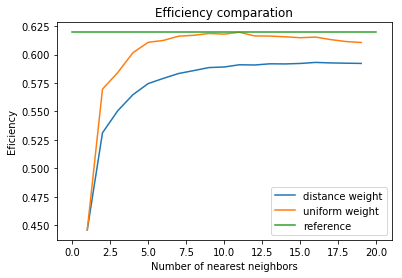

In [15]:
# Maximum efficiency
maxi  = max([max(distance),max(uniform)])
# Chooses beteween uniform or distance weight
weight = ['distance','uniform'][np.argmax([max(distance),max(uniform)])]
# Most efficient number of neighbors
N_neigh = np.argmax([distance,uniform][np.argmax([max(distance),max(uniform)])])+1
print(weight,N_neigh)

maxi  = max([max(distance),max(uniform)])
plt.plot(range(1,nmax),distance, label = 'distance weight')
plt.plot(range(1,nmax),uniform, label = 'uniform weight')
plt.plot([0,nmax],[maxi,maxi], label = 'reference')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Eficiency')
plt.title('Efficiency comparation')
plt.legend()

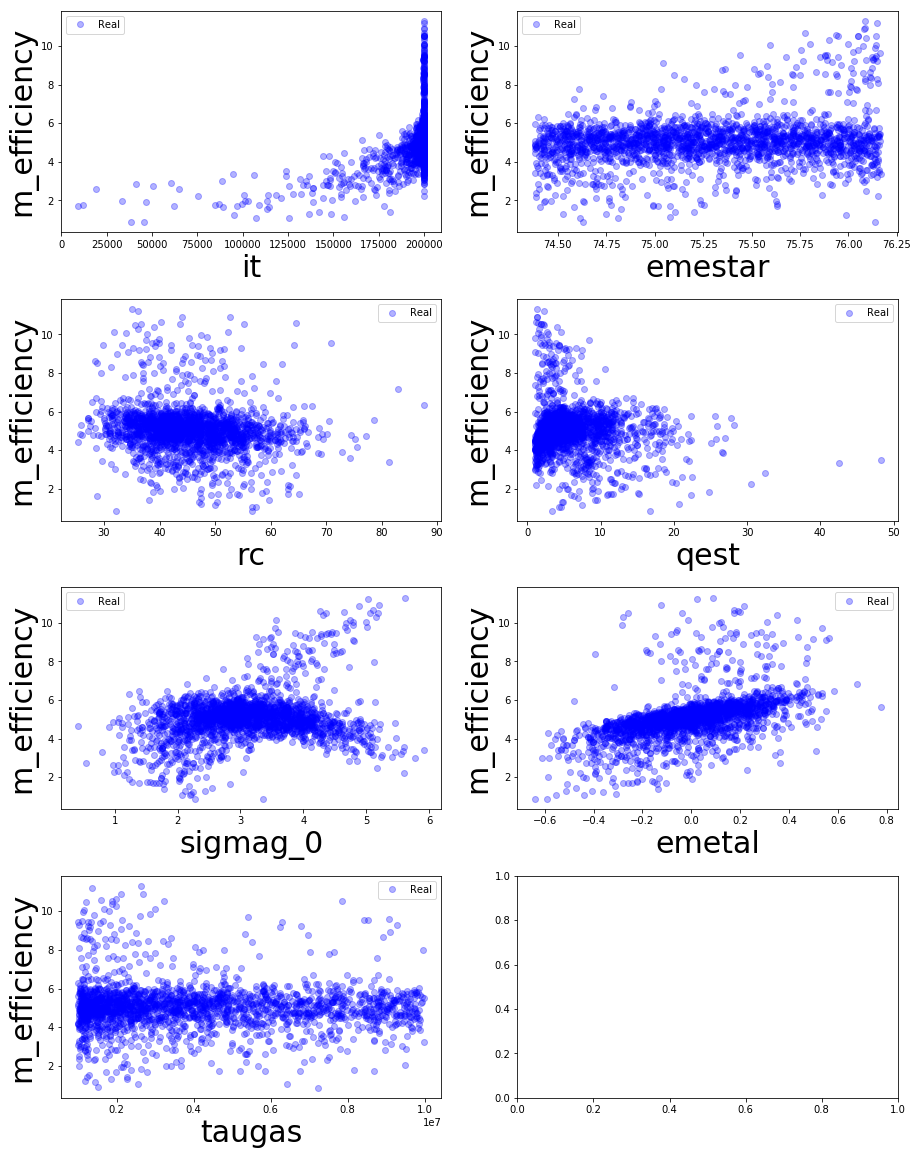

In [16]:
# Splits data into trainig and test set.
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25,
                                                    random_state=int(100*np.random.random()))

# Plots X_train, y_train
plott(X_train,y_train,data2,9)

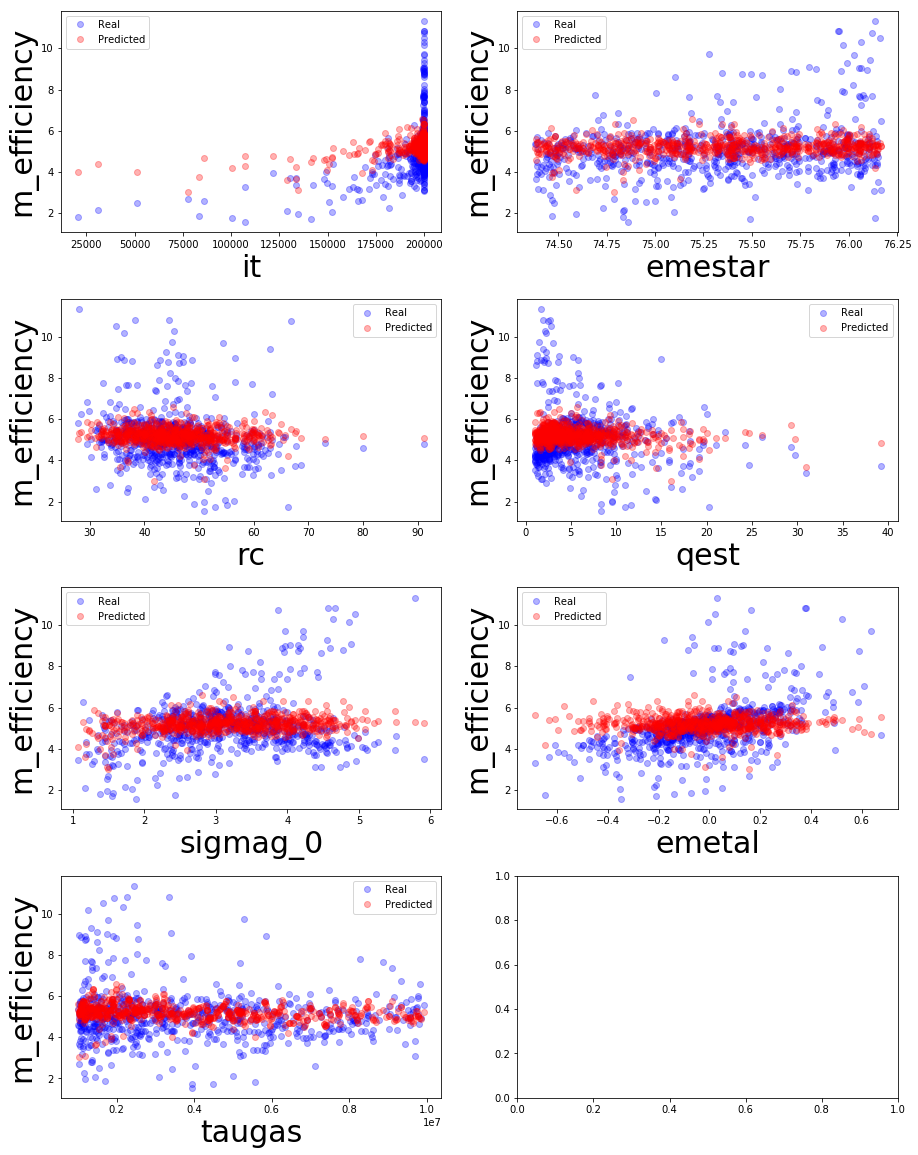

In [17]:
# Gets trained algorithm
neigh = getNeigh(X_train,y_train,number_neighs=N_neigh, weight=weight)
# Gets prediction
y_predicted = neigh.predict(X_test)

# Plots: 
# Plots X_test y_test, y_pred
plott(X_test,y_test,data2,indie = 9, ypred=y_predicted, boolean=True )

# Findig the most important parameters

For finding the most relevant parameters we decide to use decison tree. This method allows us to make superviced machine learning with non-linear data. The higher the value asociated with the parameter it has a biger importance.

## Finding relevant parameters for the number of planets

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Non initial condition parameters are dropped (total mass, mass efficiency)
#data[data.keys()[9]] = np.log(data[data.keys()[9]]+1e-5)
print(data.keys()[8],data.keys()[9])
Xdata =  data[data.keys()[:8]]
Ydata =  data[data.keys()[9]]

('emepla(i)/emet', 'n_planets')


In [20]:
# Splits data into trainig and test set.
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25,
                                                    random_state=int(100*np.random.random()))

In [21]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
arr = np.argsort(rf.feature_importances_)
for name, value in zip(data.keys()[arr[::-1]], rf.feature_importances_[arr[::-1]]):
    print(name, value)

('it', 0.49697695913957807)
('taugas', 0.1563615790107043)
('qest', 0.11398679247754195)
('sigmag_0', 0.069261505807555662)
('emestar', 0.055625523907243492)
('emed', 0.040548603302243386)
('emetal', 0.036886802197252495)
('rc', 0.030352234157880444)


## Finding the most important parameters for total mass prediction

In [22]:
# Non initial condition parameters are dropped (total mass, mass efficiency)
print(data.keys()[8],data.keys()[8])
Xdata =  data[data.keys()[:8]]
Ydata =  data[data.keys()[8]]

('emepla(i)/emet', 'emepla(i)/emet')


In [23]:
# Splits data into trainig and test set.
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25,
                                                    random_state=int(100*np.random.random()))

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
arr = np.argsort(rf.feature_importances_)
for name, value in zip(data.keys()[arr[::-1]], rf.feature_importances_[arr[::-1]]):
    print(name, value)

('it', 0.61633380885275202)
('emestar', 0.088483855796753635)
('taugas', 0.082881523386177339)
('emetal', 0.062150453014007366)
('emed', 0.049328160549544989)
('sigmag_0', 0.04025224656469488)
('rc', 0.032279588688014726)
('qest', 0.028290363148055202)


## Finding the most important parameters for mass efficency prediction

In [25]:
# Non initial condition parameters are dropped (total mass, mass efficiency)
# Disk information is dropped. If this is included, this prediction is the same as the prediction of the total mass
data2 = data.drop('emed',1)
#data2['m_efficiency'] = np.log(data2['m_efficiency'] +1e-6)
print(data2.keys()[7],data2.keys()[9])
Xdata =  data2[data2.keys()[:7]]
Ydata =  data2[data2.keys()[9]]

('emepla(i)/emet', 'm_efficiency')


In [26]:
# Splits data into trainig and test set.
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25,
                                                    random_state=int(100*np.random.random()))

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
arr = np.argsort(rf.feature_importances_)
for name, value in zip(data.keys()[arr[::-1]], rf.feature_importances_[arr[::-1]]):
    print(name, value)

('it', 0.30821503990836574)
('emed', 0.21841171755478031)
('sigmag_0', 0.14147671651551272)
('emetal', 0.099412864395549541)
('emestar', 0.084803874446367417)
('rc', 0.074092321854669838)
('qest', 0.073587465324754422)
